In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

In [3]:
onion_df = pd.read_csv('Resources/OnionOrNot.csv')  

In [4]:
onion_df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [5]:
#remove stopwords
stop = set(stopwords.words('english'))

onion_df["filtered"] = onion_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
onion_df.head()

,text,label,filtered
0,Entire Facebook Staff Laughs As Man Tightens P...,1,Entire Facebook Staff Laughs As Man Tightens P...
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,Muslim Woman Denied Soda Can Fear She Could Us...
2,Bold Move: Hulu Has Announced That They’re Gon...,1,Bold Move: Hulu Has Announced That They’re Gon...
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,Despondent Jeff Bezos Realizes He’ll Have To W...
4,"For men looking for great single women, online...",1,"For men looking great single women, online dat..."


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onion_df["filtered"], onion_df["label"], random_state=0)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [9]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<18000x21671 sparse matrix of type '<class 'numpy.int64'>'
	with 190104 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.885195394201079


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(vect.transform(X_test))

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.10033333333333333
R-squared (R2 ): 0.5663469375773706


In [16]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
#predicted_value = model.predict(X_train_vectorized)
accuracy_value = roc_auc_score(y_test, predicted)
print(accuracy_value)

0.885195394201079


In [17]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predicted , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

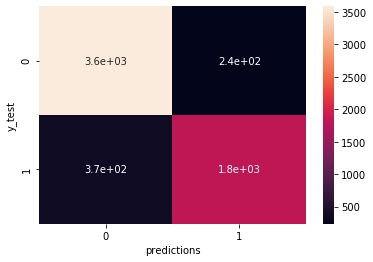

In [18]:
#plot the confusion matrix
import seaborn as sns 
ax= plt.subplot()
sns.heatmap(con_matrix, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')